# Wine Quality

## Introduction

A specific wine's overall excellence, qualities, and attractiveness are referred to as wine quality. It is a judgment based on various elements that affect the sensory experience, including balance, complexity, color, taste, and overall harmony. This is a machine learning model to forecast the quality of the wine based on input characteristics is the usual step in creating a wine quality model using Python.

## Data Preparation

In [1]:
# importing required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC #support vector classifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
# from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline 

In [2]:
#loading dataset
wine = pd.read_csv('winequality-red.csv')

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Data Processing

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1596 non-null   float64
 1   volatile acidity      1596 non-null   float64
 2   citric acid           1596 non-null   float64
 3   residual sugar        1596 non-null   float64
 4   chlorides             1596 non-null   float64
 5   free sulfur dioxide   1596 non-null   float64
 6   total sulfur dioxide  1596 non-null   float64
 7   density               1596 non-null   float64
 8   pH                    1596 non-null   float64
 9   sulphates             1596 non-null   float64
 10  alcohol               1596 non-null   float64
 11  quality               1596 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 149.8 KB


In [5]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [29]:
# Preprocessing Data
bins = (2, 6.5, 8)
group_names = ['bad','good']
wine['quality'] = pd.cut(wine['quality'], bins=bins, labels=group_names)
wine['quality'].unique()

[NaN]
Categories (0, object): []

## Feature Selection

In [7]:
label_quality = LabelEncoder()

In [8]:
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [9]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [10]:
wine['quality'].value_counts()

0    1379
1     217
Name: quality, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

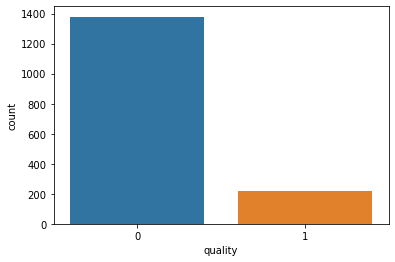

In [11]:
sns.countplot(wine['quality'])

In [12]:
# Now seperate the dataset as response variable and feature variables
X= wine.drop('quality', axis=1)
y= wine['quality']

## Splitting the Dataset

In [13]:
#Train and Test splitting of data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

In [14]:
# Applying Standard scaling to get optimized result
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
X_train[:10]

array([[-1.26843280e+00, -1.15992969e+00, -1.16552574e-01,
        -1.71339971e-01, -3.48419349e-01,  6.81596039e-01,
         3.32657330e-01, -2.10477887e-01,  7.05309843e-01,
         1.86378152e+00,  1.68143759e-01],
       [ 1.62417171e-01, -1.10356109e+00,  6.56962079e-01,
         4.45196336e-02, -1.02169773e-01,  3.60552501e-03,
         6.33146325e-01,  5.78436588e-01, -7.01410306e-02,
        -1.07728849e+00, -9.62562098e-01],
       [ 1.82220314e+00, -1.18811399e+00,  1.37890909e+00,
        -3.15246374e-01, -8.16489746e-02, -1.06180814e+00,
        -9.59445345e-01,  1.04437265e+00, -2.13801003e+00,
         2.43191925e-01, -1.15101307e+00],
       [ 1.87943714e+00, -2.86216417e-01,  6.56962079e-01,
        -8.18918784e-01,  6.19966116e-02, -9.64952352e-01,
        -5.68809653e-01,  1.65447802e-01, -1.55642187e+00,
        -5.69172591e-02, -3.65800677e-01],
       [ 3.34119167e-01, -2.58032117e-01,  1.32734145e+00,
         1.05186445e+00,  2.67204592e-01, -1.25551972e+00,
  

## Model Selection and Training

### 1) Random Forest Classifier

In [30]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc=rfc.predict(X_test)

In [17]:
pred_rfc[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
X_test[:20]

array([[ 0.73475716, -0.6526123 ,  0.50225915, -0.17133997,  0.06199661,
        -0.5775292 , -0.71905415,  0.5996155 , -0.45786647, -0.59711379,
         0.07391827],
       [-1.03949681,  0.30565386, -1.40574366, -0.24329317,  0.1646006 ,
        -1.25551972, -1.01954314, -0.61287722,  1.99772797, -0.23698277,
         1.01617315],
       [ 0.16241717, -0.03255772,  0.55382679, -0.74696558,  0.1646006 ,
        -1.06180814, -0.86929865, -0.03575186, -0.71635009, -0.83720114,
        -0.9625621 ],
       [ 2.39454313, -0.37076931,  1.84301788, -0.38719957, -0.34841935,
        -0.96495235, -0.95944535,  1.09731993, -2.07338912,  1.26356315,
        -0.20875819],
       [-0.86779481,  1.60213162, -1.14790544, -0.38719957, -0.36894015,
        -0.96495235, -0.98949424, -0.58640358,  1.286898  ,  0.00310458,
         0.35659474],
       [-0.00928483,  0.47475966,  0.14128564, -0.31524637, -0.08164897,
        -0.48067341,  0.09226613,  0.25016345,  0.57606803, -0.29700461,
        -0.208

#### Model Evaluation

In [19]:
#let's see how our model performed
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       277
           1       0.80      0.47      0.59        43

    accuracy                           0.91       320
   macro avg       0.86      0.72      0.77       320
weighted avg       0.91      0.91      0.90       320

[[272   5]
 [ 23  20]]


266 correct and 7 wrong for good quality ofwine
21 correct and 22 wrong for bad quality of wine

### 2)SVM Classifier

SVM Stands for Support Vector Model. 
SVM works well with a few variable

In [20]:
clf=svm.SVC()
clf.fit(X_train,y_train)
pred_clf=clf.predict(X_test)

#### Model Evaluation


In [21]:
#let's see how our model performed
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94       277
           1       0.69      0.26      0.37        43

    accuracy                           0.88       320
   macro avg       0.79      0.62      0.65       320
weighted avg       0.87      0.88      0.86       320

[[272   5]
 [ 32  11]]


### 3)Neural Network

This works well with large datasets. Usually for text analysis, and big data.

In [22]:
mlpc=MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=500)
mlpc.fit(X_train,y_train)
pred_mlpc=mlpc.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


#### Model Evaluation


In [23]:
#let's see how our model performed
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       277
           1       0.68      0.49      0.57        43

    accuracy                           0.90       320
   macro avg       0.80      0.73      0.76       320
weighted avg       0.89      0.90      0.89       320

[[267  10]
 [ 22  21]]


In [25]:
from sklearn.metrics import accuracy_score
cm= accuracy_score(y_test, pred_rfc)
cm

0.9125

Precision is 91.25%

In [26]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


## Prediction

In [28]:
Xnew=[[7.3,0.58,0.00,2.00,0.65,15.00,21.0,0.9946,3.36,0.47,10.0]]
Xnew=sc.transform(Xnew)
ynew=rfc.predict(Xnew)
ynew

array([0])

The prediction of Xnew is bad wine

## Conclusion

By using Python to create a wine quality model, we can use machine learning to forecast wine quality based on various input characteristics. We can build a trustworthy and accurate model using a systematic procedure that includes dataset preparation, preprocessing, feature selection/engineering, model selection and training, evaluation, tweaking, and prediction.
With its extensive ecosystem of libraries, including pandas, sci-kit-learn, and matplotlib/seaborn, Python offers the essential features and tools for successfully implementing each stage of the modeling process. These libraries simplify creating and honing the wine quality model by enabling data manipulation, feature engineering, model training, assessment, and visualization.
It is important to stress that the model's performance strongly depends on the caliber and representativeness of the training dataset. To make accurate predictions, one needs a varied and well-curated dataset that includes a variety of wine samples with credible quality ratings.
In addition, wine quality is a relative term that varies across people and civilizations. Since the model's predictions are based on the patterns and connections discovered in the training data, it's vital to remember that they could not exactly match each person's taste preferences or subjective evaluations of quality.
A Python wine quality model can help wine enthusiasts, experts, and businesses assess and comprehend the potential quality of wines based on their characteristics by helping them understand these limitations and work with the correct data and methodologies.